Using device: cuda


Map: 100%|██████████| 10/10 [00:00<00:00, 1390.22 examples/s]
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,2.799000
200,1.674300
300,1.335600


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,2.000300
200,1.056500
300,0.865500


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.875900
200,1.089400
300,0.908100


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.346000
200,0.709600
300,0.605800


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.546900
200,0.771100
300,0.623200


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.369700
200,0.752900
300,0.616800


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.402200
200,0.689100
300,0.563300


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.198400
200,0.484000
300,0.400800


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.521800
200,0.556200
300,0.438900


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.962400
200,0.440000
300,0.363400


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.312200
200,0.455900
300,0.355200


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.967400
200,0.346300
300,0.279700


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.333200
200,0.457000
300,0.339300


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.293400
200,0.373100
300,0.294600


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.099000
200,0.417400
300,0.310300


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.364000
200,0.358300
300,0.277400


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.659500
200,0.537300
300,0.379900


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.937800
200,0.330600
300,0.250900


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.937900
200,0.286600
300,0.218100


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.930400
200,0.255200
300,0.213700


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.695200
200,0.186800
300,0.155600


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.786300
200,0.246600
300,0.213800


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.255600
200,0.238900
300,0.180400


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.971900
200,0.305700
300,0.239500


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.863900
200,0.226000
300,0.184200


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.891300
200,0.230400
300,0.200100


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.087700
200,0.290600
300,0.236300


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,0.728400
200,0.185200
300,0.159300


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.120300
200,0.250100
300,0.189300


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
100,1.104100
200,0.263100
300,0.209200


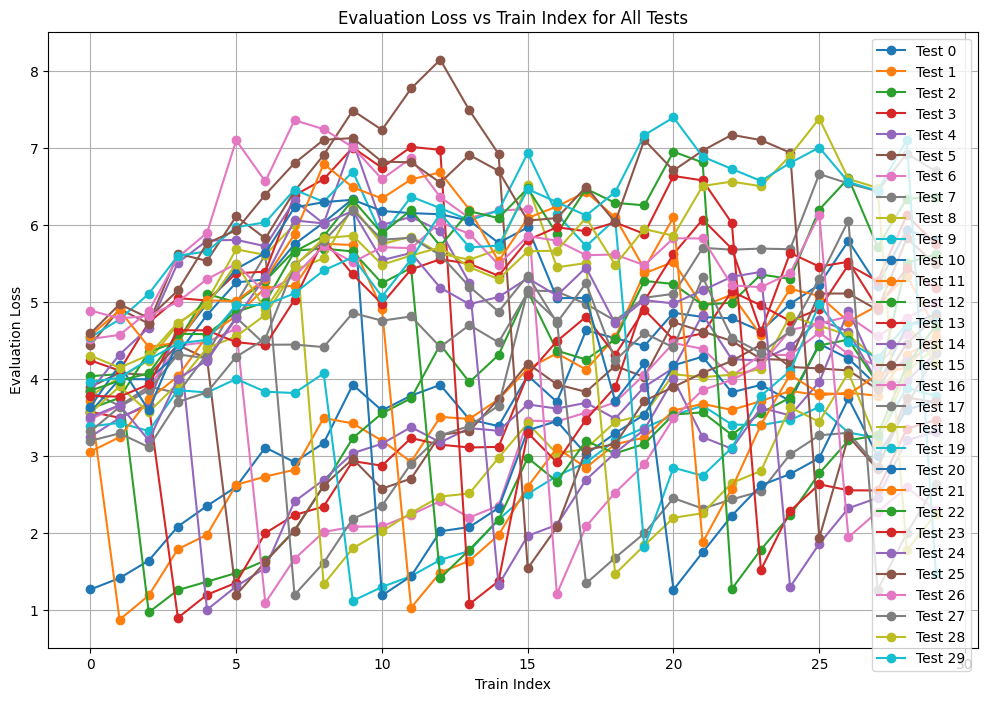

In [10]:
# Import Required Libraries
import torch
from datasets import Dataset
from transformers import AutoModelForCausalLM, AutoTokenizer
from trl import SFTTrainer, SFTConfig
from torch.optim import SGD
import json
import matplotlib.pyplot as plt

# Parameters
epochs = 10
batch_size = 1
learning_rate = 1e-3

# File paths
dataset_path = "d2p_each_dataset.json"

# Load Dataset
with open(dataset_path, 'r') as f:
    dataset = json.load(f)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Model and Tokenizer
model_name = "meta-llama/Llama-3.2-1B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

# Freeze the embedding layer (embed_tokens)
for param in model.model.embed_tokens.parameters():
    param.requires_grad = False

# Freeze the head (lm_head)
for param in model.lm_head.parameters():
    param.requires_grad = False

# Set the padding token
tokenizer.pad_token = tokenizer.eos_token

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",  # Ensures consistent input length
        truncation=True,       # Truncates sequences exceeding `max_seq_length`
        max_length=128,        # Defined in training args
        return_tensors="pt"    # Returns PyTorch tensors
    )

# Prepare Train and Test Datasets
train_datasets = []
test_datasets = []

for idx, individual_data in enumerate(dataset):    
    # Prepare Train and Test Data
    train_data = individual_data['train']
    test_data = individual_data['test']

    # Convert to Hugging Face Dataset
    train_dataset = Dataset.from_dict({
        'text': [item['prompt'] + item['completion'] for item in train_data]
    }).map(tokenize_function, batched=True)
    
    test_dataset = Dataset.from_dict({
        'text': [item['prompt'] + item['completion'] for item in test_data]
    }).map(tokenize_function, batched=True)

    train_datasets.append(train_dataset)
    test_datasets.append(test_dataset)

# Store evaluation results for plotting
series_data = []

# Training and Evaluation Loop
for train_idx, train_dataset in enumerate(train_datasets):
    # Training Configuration
    training_args = SFTConfig(
        output_dir=f"./outputs/train_{train_idx}",
        num_train_epochs=epochs,
        per_device_train_batch_size=batch_size,
        max_seq_length=128,
        logging_steps=100,
    )

    # Initialize Optimizer
    optimizer = SGD(model.parameters(), lr=learning_rate)

    # Initialize SFTTrainer
    trainer = SFTTrainer(
        model=model,
        train_dataset=train_dataset,
        tokenizer=tokenizer,
        args=training_args,
        optimizers=(optimizer, None)
    )

    # Train the Model
    trainer.train()
    
    # Evaluate the Model
    for test_idx, test_dataset in enumerate(test_datasets):
        eval_results = trainer.evaluate(eval_dataset=test_dataset)
        eval_loss = eval_results['eval_loss']

        # Append data for graph
        series_data.append({
            "train_idx": train_idx,
            "test_idx": test_idx,
            "eval_loss": eval_loss,
        })

    # Clear GPU Memory
    torch.cuda.empty_cache()

# Plotting after all evaluations are done
plt.figure(figsize=(12, 8))

# Plot each test_idx's line
test_idx_set = set(item["test_idx"] for item in series_data)

for test_idx in test_idx_set:
    test_data = [item for item in series_data if item["test_idx"] == test_idx]
    plt.plot(
        [item["train_idx"] for item in test_data],
        [item["eval_loss"] for item in test_data],
        marker='o',
        label=f'Test {test_idx}'
    )

# Set plot labels and title
plt.xlabel("Train Index")
plt.ylabel("Evaluation Loss")
plt.title("Evaluation Loss vs Train Index for All Tests")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("evaluation_loss_plot.png")
plt.show()


In [3]:
test_dataset

Dataset({
    features: ['text'],
    num_rows: 10
})